# 概要
教師あり学習の線形分類の基本的な考え方を学ぶ。そのためにパーセプトロンを実装してみる。

## パーセプトロン
1個のニューロンを模したアルゴリズムで、線形分離可能なデータセットに対して2つに分類することができる。軸索での他ニューロンからのインプットを

重みベクトル・入力データベクトル^(i) + 定数（重みの0番目と考える）

で現し、活性化を２値の階段関数（-1が定常, 1が発火）で考え、データを分類することを考える。

教師あり学習を考えているので、データセットとしては[入力データベクトル^(0),入力データベクトル^(1), ... ]に対して[答え[0], 答え[1], ...]を想定している

## パーセプトロンのルール
1. 重みベクトルを0 or 小さいランダムな値で初期化
2. 各データセット(i)ごとに
    1. 階段関数(重みベクトル・入力データベクトル(i))を計算して推測値を出す
    2. 推測値と教師と比べて、重みベクトルを更新
    
更新は、

- 重み＿( j )    += 学習率 ・（答え - 推測値）・入力データベクトル^(i)＿(j)
- 重み＿(0)   += 学習率 ・（答え - 推測値）

で行う。（目的関数を（答え-推測値)^2 として、各重みで偏微分）


In [1]:
import numpy as np
# 例えば2次元の
input_vecs = np.array([[1,2],[1,3], [-1,1], [-1,2]]) # データーセット
awnser_value = [1,1,-1,-1] # 答え
# に対して、重みは3次元で用意し、
weight = np.zeros(3)
# を考えインプットは
input_value = np.dot(input_vecs[0], weight[1:]) + weight[0]
print("入力値:" +str(input_value))
# を考える

入力値:0.0


In [2]:
# 活性化関数は
predict_value = np.where(input_value >0.0, 1, -1)
print("予測値:" , str(predict_value))

予測値: -1


In [3]:
# 学習は学習率で、
learning_rate = 0.1
# 学習率・（答え - 推測）は
update = learning_rate * (awnser_value[0] - predict_value)
# 重みの更新は
weight[1:] += update * input_vecs[0]
weight[0] += update
print(weight)

[ 0.2  0.2  0.4]


これを全データセットに対して行い、また繰り返し行うことで、精度を上げていく。

使いやすいように、本通りにクラスで実装してみる。


In [4]:
class Perceptron(object):
    """
    eta : 学習率η
    n_iter :  学習を何回繰り返すか
    X : 入力のデータセット
    y : 答えのデータセット
    w_ : 重みベクトル
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X , y):
        """
        学習メソッド
        X : np.array
        y : np.array
        """
        self.w_ = np.zeros(1 + X.shape[1]) # 入力データセット + 1で重み初期化
        self.errors_ = [] #あとで学習の結果を見るため
        for _ in range(self.n_iter):
            error = 0
            for xi, yi in zip(X, y):
                update = self.eta * (yi - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                error += int(update != 0.0)
            self.errors_.append(error)
        return self
    
    def net_input(self, X):
        """
        活性化関数に入れる前の入力の値を決める。predictから使われる
        return: 重みベクトル・入力データベクトル^(i) + 定数（重みの0番目と考える）
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """
        予想値を出力する
        return: 階段関数（入力値）
        """
        return np.where(self.net_input(X) >=0.0, 1, -1)

# 実際にirisデータで学習してみる

In [5]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

df = pd.io.parsers.read_csv(
    filepath_or_buffer='data/iris.data',
    header=None,
    sep=',',
    )

print(df.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [6]:
y = df.iloc[:100, 4].values # 答えを抽出
y = np.where(y=="Iris-setosa", -1, 1)  # 答えを階段関数と同じ形式にする
print("\n答え:" +str(y[:5]))


答え:[-1 -1 -1 -1 -1]


In [7]:
X = df.iloc[:100, [0,2]].values # 入力ベクトルを抽出
X[:5]

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4]])

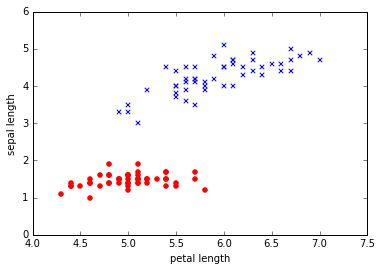

In [8]:
#プロットしてみる
for xi, yi in zip(X, y):
    if yi == -1:
        plt.scatter(xi[0], xi[1], color="red", marker="o", label="setosa")
    else:
        plt.scatter(xi[0], xi[1], color="blue", marker="x", label="versicolor")
plt.xlabel("petal length")
plt.ylabel("sepal length")
plt.show()

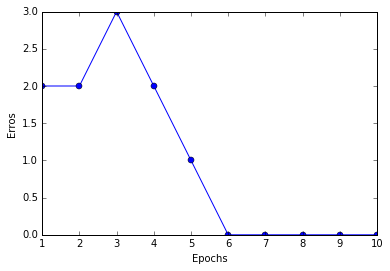

In [9]:
# 学習してみる
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Erros")
plt.show()

エラーがー少なくなっていることがわかる（予想できた）

# Adaptive Linear Neuron
パーセプトロンとの違いは、活性化関数を恒等写像にし、分類はQuantizerを使うことである。

- 入力ベクトル→重みベクトル→活性化関数（階段関数）
- 入力ベクトル→重みベクトル→活性化関数（恒等写像）→Quantizer（階段関数）

学習は活性化関数で行い、目的関数（ここでは二乗誤差関数）を最小化することを考える。最小化のアルゴリズムには最急降下法を用いる。

二乗誤差関数は

```python
def cost_fucntion(X,Y):
    """擬似コードです"""
    costs = 0
        for xi, yi in zip(X, Y):
            costs += np.power(yi - (np.dot(xi, w[1:])+w[0],2)/2        
    return costs
```

で、すべてのデータセットに対しての和を考えているところがパーセプトロンとの違いです。そのため、バッチ学習と呼ばれたりもします。

これを各重みで偏微分して、学習率をかけて目的関数を最小化する。

```python
def update_weight(X, Y, learning_rate)
    """擬似コードです"""
    output = self.activate_func(X) # 活性化での出力（ベクトル）
    erros = (Y - output)
    w[1:] += learning_rate * X.T.dot(erros) # Xを転置して、内積
    w[0]  += learning_rate * erros.sum()
```

パーセプトロンとは違い、学習がすべてのデータセットで行っていることがわかる。

ただ、データセットが多いと計算量が問題になったり、また重みの変更が1イテレーションごとに1回なので、効率が悪い。そのため

- 確率的勾配降下法
- ミニバッチ

などの手法が考えられている。


# 確率的勾配降下法
最急降下法から、各イテレーションごとの学習のデータセットをランダムに取得し、また重みの学習も各データセットごとに置き換えたもの。

それにより、学習のスピードがはやく、大量のデータに対しても計算量が多くなり過ぎない。

また、次々にデータが増えていくデータセットに対しても学習することができ、オンライン学習のうちの一つと言われる。